In [1]:
import sys
import os
sys.path.append(os.path.join(".","nptools"))

#Jseq = "GCTCAGTGGTGTACGGTACAAACCAGTAGCTAGCATTATACCTAGGACTGAGCTAGCTGTCAGCTCCGGCTTGTCGACGACGGCGT"
#Pseq = "GCTCAGTGGTGTACGGTACAAACCAGTATCCACACATTATACGAGCCGGATGATTAAATTGAAACTCCGGCTTGTCGACGACGGCGT"

Jonly = "CTGACAGCTAGCTCAGTCCTAGGTATAATGCTAGC" #this one is on the "CC" plasmid
Ponly = "TTTCAATTTAATCATCCGGCTCGTATAATGTGTGGA" #this one is on the "PA" plasmid
bc0 = "AGTAGCACTAGGCAATTTGTTCCGTATTGAAGAGACAGC" #I accidentally put this one on both plasmids, then changed to below
bc1 = "ACCAATGGAGCAGGAATAGTTACTCATCAGCTGGTGAG" #this one is usually associated with the "CC" plasmid
bc2 = "CTAGTTAGATGATAAACTAGTTGCTTGGAACGAACCGG" #this one is associated with the "PA" plasmid
beginner =     "CAAGCCCATTATTACCCTGTTATCCCTAGACACCAATCAGAGGCCACA"#"TCGACGACGGCGTG")
attBsiteU21R = "CCCAGCAGGTATGATCCTGACGACGGAGCACGCCGTCGTCGACAAGCC"#"AGTTCGTAGACGGA")
attBsiteU22R = "TTTGTTAGGTATGATCCTGACGACGGAGCACGCCGTCGTCGACAAGCC"
attBnoU = "AGGTATGATCCTGACGACGGAGCACGCCGTCGTCGACAAGCC"
U21primerend = "GTACAAACCAGTAGCTAGCATTATACCTAGGACTGAGCTAGCTGTCAGCTCCGGCTTGTC"+\
                "GACGACGGCGTGCTCCGTCGTCAGGATCATACCTGCTGGGAGTTCGTAGACGGA"

U22primerend = "GCTCAGTGGTGTACGGTACAAACCAGTATCCACACATTATACGAGCCGGATGATTAAAT"+\
                "TGAAACTCCGGCTTGTCGACGACGGCGTGCTCCGTCGTCAGGATCATACCTAACAAACGCAGAATCCAAGC"

newplasmend1 = "GATAAAAACGGTTAGCGCTTCGTTGCCTAGGGATAACAGGGTAATGCCTG"
newplasmend2 = "TAATCTCATGACCAAAATCCCTTATGCCTAGGGATAACAGGGTAATGCCT"


barcodes = {
    "BC01":"AAGAAAGTTGTCGGTGTCTTTGT",
    "BC02":"TCGATTCCGTTTGTAGTCGTCTG",
    "BC03":"GAGTCTTGTGTCCCAGTTACCAG",
    "BC04":"TTCGGATTCTATCGTGTTTCCCT",
    "BC05":"CTTGTCCAGGGTTTGTGTAACCT",
    "BC06":"TTCTCGCAAAGGCAGAAAGTAGT",
    "BC07":"GTGTTACCGTGGGAATGAATCCT",
    "BC08":"TTCAGGGAACAAACCAAGTTACG",
    "BC09":"AACTAGGCACAGCGAGTCTTGGT",
    "BC10":"AAGCGTTGAAACCTTTGTCCTCT",
    "BC11":"GTTTCATCTATCGGAGGGAATGG",
    "BC12":"CAGGTAGAAAGAAGCAGAATCGG",
    "BC13":"AGAACGACTTCCATACTCGTGTG",
    "BC14":"AACGAGTCTCTTGGGACCCATAG",
    "BC15":"AGGTCTACCTCGCTAACACCACT"
    }
from nanopore_scripts import *
npbc_justseqs = []
npbc_justseqs_rc = []
for bc in barcodes:
    npbc_justseqs+=[barcodes[bc]]
    npbc_justseqs_rc+=[rc(barcodes[bc])]
    barcodes[bc]= (barcodes[bc],rc(barcodes[bc]))
npbc_justseqs += npbc_justseqs_rc
print("done")

done


In [8]:
import glob
fastqdirectory = os.path.join(".","data")
#print(glob.glob(os.path.join(fastqdirectory,"*.fastq")))
fastqfilename = None
i = 3
processreads = 500
#testread = rc(testread)[slicing[0]:slicing[1]] #[298+86-12:298+86+86+12]#[130:212]
seqstats = [0,0,0]
postfix = [attBnoU]
#prefix =  [U21primerend,U22primerend]
prefix = [rc(beginner)]
vseqs = [bc1,bc2]
postfix = [rc(newplasmend1),rc(newplasmend2)]
#prefix =  [rc(U21primerend),rc(U22primerend)]
#postfix = [attBnoU]
variable_error_frac = 0.4
prefix_error_frac = 0.4
postfix_error_frac = 0.4
max_misscount = 2 #delete reads with more than two mismatches

attb_detection_threshold = len(prefix[0])/5
frontchecklength = 130

variable_length=sum([len(a) for a in vseqs])/float(len(vseqs))
variable_errors_allowed = int(variable_length*variable_error_frac)

prefix_length=sum([len(a) for a in prefix])/float(len(prefix))
prefix_errors_allowed = int(prefix_length*prefix_error_frac)

postfix_length=sum([len(a) for a in postfix])/float(len(postfix))
postfix_errors_allowed = int(postfix_length*postfix_error_frac)

""
allseqDict,seqstats,unsorted=barcodeSplitAndCountRecords(fastqdirectory,barcodes,\
                                                barcode_detection_threshold=8,\
                                                end_threshold=postfix_errors_allowed,\
                                                processreads=processreads,\
                                                prefix_sequence=prefix,\
                                                    postfix_sequence=postfix,\
                                                prefix_detection_threshold=prefix_errors_allowed,\
                                                variable_sequence_threshold=variable_errors_allowed,\
                                                variable_sequences=vseqs,\
                                                frontchecklength=frontchecklength,\
                                                visualize=False)

allseqdictpart2,seqstatspart2,unsortedpart2 = barcodeSplitAndCountRecords(unsorted,barcodes,\
                                                barcode_detection_threshold=8,\
                                                end_threshold=postfix_errors_allowed,\
                                                processreads=processreads,\
                                                prefix_sequence=prefix,\
                                                    postfix_sequence=postfix,\
                                                prefix_detection_threshold=prefix_errors_allowed,\
                                                variable_sequence_threshold=variable_errors_allowed,\
                                                variable_sequences=vseqs,\
                                                frontchecklength=frontchecklength,\
                                                visualize=False)

print("we had {} forward, {} reverse, and {} where we couldn't tell".format(seqstats[0],seqstats[1],seqstats[2]))
print("we had {} forward, {} reverse, and {} where we couldn't tell the second time".\
                                                      format(seqstatspart2[0],seqstatspart2[1],seqstatspart2[2]))
bcwefound =sorted(allseqDict.keys())
numseqs = [len(allseqDict[a]) for a in bcwefound]
[print("{}:{}".format(a[0],a[1])) for a in zip(bcwefound,numseqs)]
print("{} sequences were split from existing ones".format(len(unsorted)))
print("now, operating on the split sequences...")
bcwefound =sorted(allseqdictpart2.keys())
numseqs = [len(allseqdictpart2[a]) for a in bcwefound]
[print("{}:{}".format(a[0],a[1])) for a in zip(bcwefound,numseqs)]
print("{} sequences were split from existing ones".format(len(unsortedpart2)))

for a in allseqdictpart2:
    if(a in allseqDict):
        allseqDict[a] = allseqDict[a]+allseqdictpart2[a]
print("final totals are:")
bcwefound =sorted(allseqDict.keys())
numseqs = [len(allseqDict[a]) for a in bcwefound]
[print("{}:{}".format(a[0],a[1])) for a in zip(bcwefound,numseqs)]
#print(U21primerend)
filtered_allseqDict = {}
for bc in allseqDict:
    filtered_allseqDict[bc]=[]
    for n,seq in enumerate(allseqDict[bc]):
        misscount = seq.count(-1)
        if(misscount<=max_misscount):
            filtered_allseqDict[bc] += [seq]
print(filtered_allseqDict["BC01"])
#print(testread)
#help(edlib.align)

FloatProgress(value=0.0, max=1.0)

2


FloatProgress(value=0.0, max=1.0)

we had 252 forward, 234 reverse, and 14 where we couldn't tell
we had 9 forward, 8 reverse, and 16 where we couldn't tell the second time
BC01:47
BC02:150
BC03:28
BC04:19
BC05:33
BC06:16
BC07:13
BC08:6
BC09:36
BC10:33
BC11:27
BC12:72
BC13:1
none:19
33 sequences were split from existing ones
now, operating on the split sequences...
BC02:4
BC03:1
BC05:1
BC06:1
BC08:2
BC11:1
none:23
5 sequences were split from existing ones
final totals are:
BC01:47
BC02:154
BC03:29
BC04:19
BC05:34
BC06:17
BC07:13
BC08:8
BC09:36
BC10:33
BC11:28
BC12:72
BC13:1
none:42
[('B0', 0, -1), (0, 0, 'E0'), (0, 0, 0, 'E0'), (0, 0, 0, 'E0'), (0, 1, 'E0'), ('B0', 0, -1), (0, 0, 'E0'), ('B0', -1), ('B0', 0, -1), ('B0', 0, 0, 0, 0, -1), ('B0', 1, -1), ('B0', 0, 0, 0, 0, -1), (0, 0, 'E0'), (0, 0, 'E0'), ('B0', 0, -1), (0, 0, 'E0'), (0, 0, 'E0'), (0, -1, 'E0'), (0, 0, -1, 'E0'), (0, 0, 0, 0, 0), (0, -1, 'E0'), (0, -1, 'E0'), ('B0', 0, -1), ('B0', 0, -1), ('B0',), (0, 0, 0, 0, 0, 'E0'), (0, -1, 'E0'), (0, -1, 'E0'), ('B0',

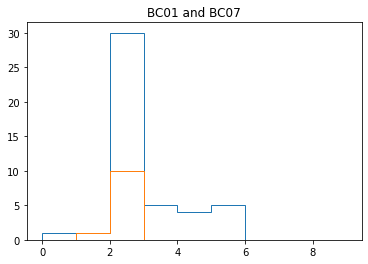

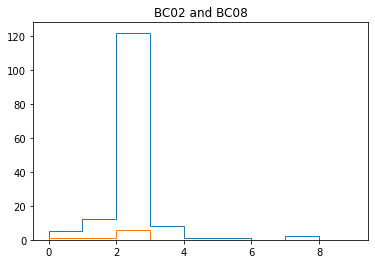

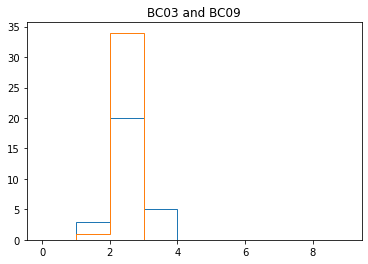

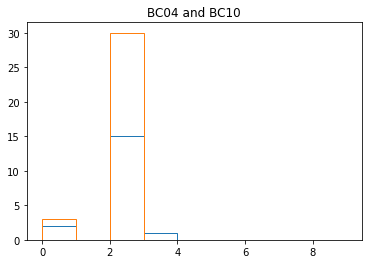

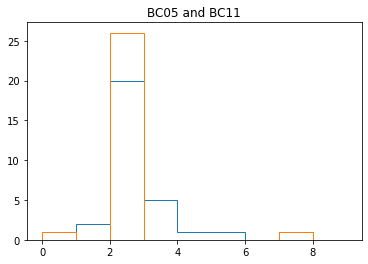

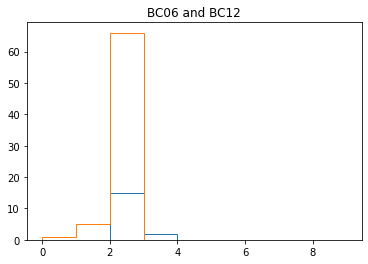

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
lengths = {}

allbcs = sorted(list(filtered_allseqDict.keys()))

for bc in allbcs:
    lengths[bc]=[]
    for seq in filtered_allseqDict[bc]:
        lengths[bc]+=[len(seq)-1]


pairedbcs = [["BC01","BC07"],\
              ["BC02","BC08"],\
              ["BC03","BC09"],\
              ["BC04","BC10"],\
              ["BC05","BC11"],\
              ["BC06","BC12"],]

for bc1,bc2 in pairedbcs:
    plt.figure()
    bins = range(10)
    plt.hist(lengths[bc1],bins=bins,label=bc1,histtype='step')
    plt.hist(lengths[bc2],bins=bins,label=bc2,histtype='step')
    plt.title(f"{bc1} and {bc2}")
    plt.show()


In [ ]:
#Now we save our barcoded data into a pickle!!
import pickle
save_barcoded_file="191118_simprec.pickl"
try:
    keylen = len(allseqDict.keys())
    if(keylen > 0):
        with open(os.path.join(".","output",save_barcoded_file),"wb") as saved_file:
            pickle.dump(allseqDict,saved_file)
    else:
        print("didn't save becase the data member was empty")
except NameError:
    print("didn't save because the data member didn't exist")

In [ ]:
import pickle
import pandas
import os
save_barcoded_file="191118_simprec.pickl"
input_conditions_file = "191115_input.csv"

experiment_dataframe = pandas.read_csv(os.path.join(".","input",input_conditions_file)).fillna(0)

with open(os.path.join(".","output",save_barcoded_file),'rb') as saved_file:
    allseqDict = pickle.load(saved_file)

In [ ]:
bcnum = 2
bcnum2 = 3
bclist = sorted([a for a in allseqDict.keys()])
print("barcode number "+str(bcnum))
print("second barcode number "+str(bcnum2))
for b in bclist:
    cnum1 = 0
    cnum2 = 0
    countnum = 0
    for a in allseqDict[b]:
        stra = "".join([str(i) for i in a])
        cnum1 += a.count(bcnum)
        cnum2 += a.count(bcnum2)
        z1 = (str(bcnum)+str(bcnum2)) in stra
        z2 = (str(bcnum2)+str(bcnum)) in stra
        
        if(z1 or z2):
            #print(a)
            countnum+=1
    print(b + " has " + str(cnum1)+ " "+str(bcnum) + " and "+ str(cnum2)+ " "+str(bcnum2))
#print('\n'.join([b+" has "+ str(sum([(bcnum in a) and (bcnum2 in a) for a in allseqDict[b]])) for b in bclist]))

barcode number 2
second barcode number 3
BC01 has 82 2 and 1 3
BC02 has 77 2 and 106 3
BC03 has 20 2 and 22 3
BC04 has 18 2 and 5 3
BC05 has 50 2 and 1 3
BC06 has 11 2 and 11 3
BC07 has 1 2 and 7 3
BC08 has 0 2 and 8 3
BC09 has 0 2 and 36 3
BC10 has 0 2 and 34 3
BC11 has 6 2 and 30 3
BC12 has 0 2 and 70 3
BC13 has 0 2 and 1 3
none has 13 2 and 19 3


In [ ]:
#load the pickle!!! Also load conditions from a file!!!
import pickle
import pandas
import os
save_barcoded_file="191118_simprec.pickl"
input_conditions_file = "191115_input.csv"

experiment_dataframe = pandas.read_csv(os.path.join(".","input",input_conditions_file)).fillna(0)

with open(os.path.join(".","output",save_barcoded_file),'rb') as saved_file:
    allseqDict = pickle.load(saved_file)


#bclists = []
#bclists = [simprec.BC01,simprec.BC02,simprec.BC03,simprec.BC04,simprec.BC05,\
#           simprec.BC06,simprec.BC07,simprec.BC08,simprec.BC09,simprec.BC10,\
#           simprec.BC11,simprec.BC12,simprec.BC13,simprec.BC14,simprec.BC15,\
#           simprec.none]
#bcnames = ["BC01","BC02","BC03","BC04","BC05",\
#           "BC06","BC07","BC08","BC09","BC10",\
#           "BC11","BC12","BC13","BC14","BC15","none"]

#bcDict = {a[0]:a[1] for a in zip(bcnames,bclists)}
PJdict = {}
letters = ["J","P","E","Q"]
for bc in experiment_dataframe["barcode"]:
    seqs = []
    for seq in allseqDict[bc]:
        convertedseq = ""
        for element in seq:
            if(element in range(len(letters))):
                convertedseq += letters[element]
        if(convertedseq != ""):
            newseq = convertedseq [:-1]
            if(newseq != "" and len(newseq)>1):
                seqs+=[newseq]
    PJdict[bc] = seqs
#print(PJdict["BC01"])

all_lists,run_lists,switch_lists,first_last = countBarcodeStats(PJdict,chopseqs='left')
stats_counted = [
    (["total Ps in a read","total Js in a read"],all_lists),
    (["longest P run in a read","longest J run in a read"],run_lists),
    (["PJ", "JP"],switch_lists),
    (["P/J, first","P/J, last"],first_last),
]

In [ ]:
experiment_dataframe[experiment_dataframe["barcode"]=="BC01"].iloc[0]

SAL         100
CIN           0
ATC           0
ARA           0
primer      u22
ink0        i70
ink1          0
rec         r48
barcode    BC01
Name: 0, dtype: object

.\nptools\nanopore_scripts.py:870: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  normed=True,cmap = "Reds")
.\nptools\nanopore_scripts.py:877: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  normed=True,cmap = "viridis")
D:\anaconda3\lib\site-packages\numpy\lib\histograms.py:1123: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
<string>:6: UserWarning: Warning: converting a masked element to nan.
D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

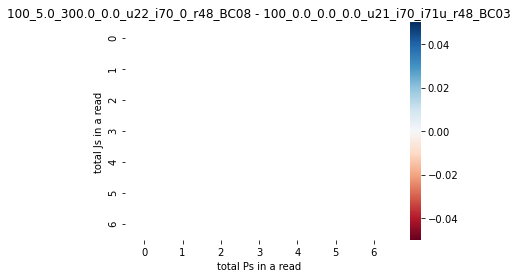

<Figure size 432x288 with 0 Axes>

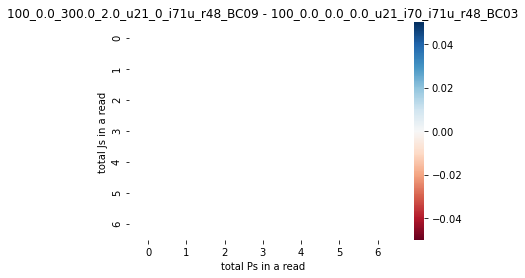

<Figure size 432x288 with 0 Axes>

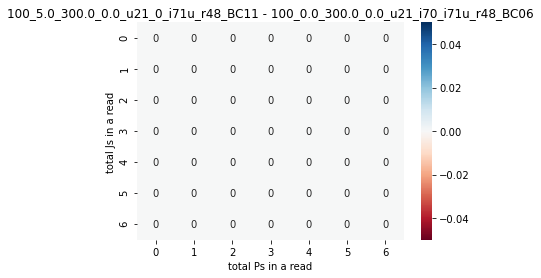

<Figure size 432x288 with 0 Axes>

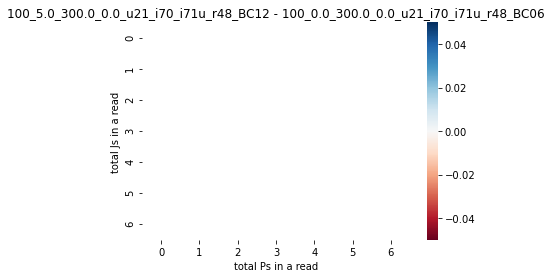

In [ ]:
%matplotlib inline
stat = 0

labs = stats_counted[stat][0]
dlist = stats_counted[stat][1]

#crange = [0,.01,6]
crange = [0,.02,1]
sqrange = [-.5,6.5]

diffPlotWrapper("BC03","BC08",experiment_dataframe,dlist,labs=labs)
diffPlotWrapper("BC03","BC09",experiment_dataframe,dlist,labs=labs)

diffPlotWrapper("BC06","BC11",experiment_dataframe,dlist,labs=labs)
diffPlotWrapper("BC06","BC12",experiment_dataframe,dlist,labs=labs)

#makeBCplot1("BC07",crange,sqrange,experiment_dataframe,dlist,labs)
#makeBCplot1("BC08",crange,sqrange,experiment_dataframe,dlist,labs)
#makeBCplot1("BC09",crange,sqrange,experiment_dataframe,dlist,labs)

#makeBCplot1("BC10",crange,sqrange,experiment_dataframe,dlist,labs)
#makeBCplot1("BC11",crange,sqrange,experiment_dataframe,dlist,labs)
#makeBCplot1("BC12",crange,sqrange,experiment_dataframe,dlist,labs)
print("")
#diffPlotWrapper("BC03","BC06",experiment_dataframe,dlist,labs=labs)
#diffPlotWrapper("BC02","BC07",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC03","BC08",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC04","BC09",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC05","BC10",conditions,bcnames,dlist,labs=labs)

#diffPlotWrapper("BC01","BC11",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC02","BC12",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC03","BC13",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC04","BC14",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC05","BC15",conditions,bcnames,dlist,labs=labs)

#diffPlotWrapper("BC14","BC13",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC15","BC13",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC05","BC10",conditions,bcnames,dlist)

#diffPlotWrapper("BC03","BC13",conditions,bcnames,dlist)
#diffPlotWrapper("BC04","BC14",conditions,bcnames,dlist)
#diffPlotWrapper("BC05","BC15",conditions,bcnames,dlist)

#diffPlotWrapper("BC02","BC12",conditions,bcnames,dlist)
#diffPlotWrapper("BC05","BC09",conditions,bcnames,dlist)
#diffPlotWrapper("BC04","BC08",conditions,bcnames,dlist)



In [ ]:
plotbcnames = bcnames #[:10]
ticks = np.arange(len(plotbcnames))-.4
secondticks = np.arange(len(plotbcnames))
first_barcode = [first_last[a][0]/float(first_last[a][2]) for a in plotbcnames]
second_barcode = [first_last[a][1]/float(first_last[a][2]) for a in plotbcnames]
plt.bar(ticks,first_barcode,.4)
plt.bar(secondticks,second_barcode,.4)
plt.ylim(0,1)
#plt.legend(["first","last"])
plt.xticks(ticks,conditions,rotation=90)
pass

NameError: name 'bcnames' is not defined

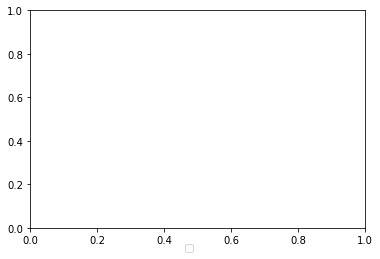

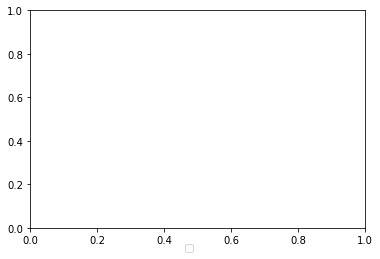

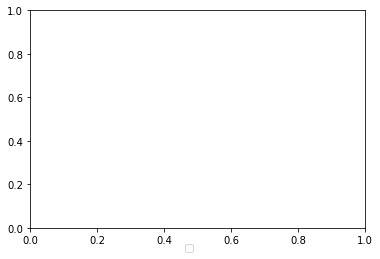

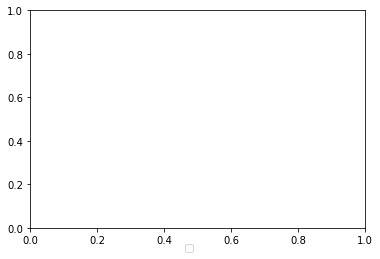

In [ ]:
stretch = True
def recorderplots(experiment_dataframe,letters="PJ",stretch=stretch):
    legendlist = []
    bclist = experiment_dataframe["barcode"]
    for bc in bclist:
        x,y,z = quantifyRecOrder(PJdict[bc],letters=letters,stretch=stretch)
        plt.plot(z)
        legend_unit = condNameBC(bc,experiment_dataframe)
        legendlist += [legend_unit]
    plt.legend(legendlist,bbox_to_anchor=(0.5, -0.05),)

    
plotdf = experiment_dataframe[(experiment_dataframe["SAL"]==100) &\
                              (experiment_dataframe["ink0"]=='g0') &\
                              ((experiment_dataframe["ATC"]>0) |\
                             (experiment_dataframe["CIN"]>0))]
recorderplots(plotdf)
plt.figure()
plotdf = experiment_dataframe[(experiment_dataframe["ink0"]=='g0') &\
                              ((experiment_dataframe["ATC"]==0))]
recorderplots(plotdf)
plt.figure()
plotdf = experiment_dataframe[(experiment_dataframe["SAL"]==100) &\
                              (experiment_dataframe["ink0"]=='g4') &\
                              ((experiment_dataframe["ATC"]>0) |\
                             (experiment_dataframe["CIN"]>0))]
recorderplots(plotdf)
plt.figure()
plotdf = experiment_dataframe[(experiment_dataframe["ink0"]=='g4') &\
                              ((experiment_dataframe["ATC"]==0))]
recorderplots(plotdf)